In [1]:
import sys
sys.path

['/home/joker/Downloads/Video/SEM1-Downloads/CS771A/demo01',
 '/home/joker/anaconda3/lib/python38.zip',
 '/home/joker/anaconda3/lib/python3.8',
 '/home/joker/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/joker/anaconda3/lib/python3.8/site-packages',
 '/home/joker/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/joker/.ipython']

In [3]:

import numpy as np
import numpy.linalg as lin
import time as t

# cs771 will be our course package and will contain several modules
# Right now we have a dummy module, a data generation module and a data plotting module
from cs771 import helloWorld as hW
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd


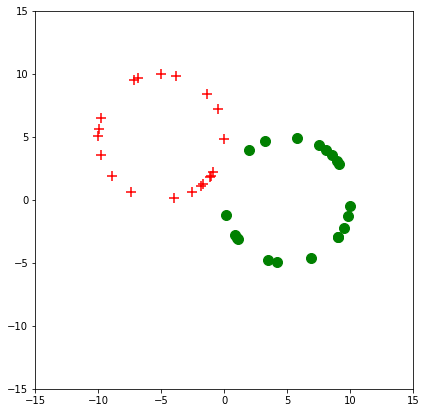

In [4]:
# We will work with a toy dataset in 2D with 20 points per class
# Feel free to change n and see what happens. Changing d will break things though
d = 2 
n = 20

# Choose points around which positive and negative class points will be sampled
muPos = np.array( [-5,5] )
muNeg = np.array( [5,0] )

# Generate nice spherical data using our data generation module
# Choose a nice radius
r = 5
XPos = gsd.genSphericalData( d, n, muPos, r )
XNeg = gsd.genSphericalData( d, n, muNeg, r )

# Let us plot these points on a plane and see where they landed
# First, obtain a new figure from the plotting module - the two arguments set the size of the figure
fig1 = pd.getFigure( 7, 7 )

# The three commands below are just to give the plot an aesthetic aspect ratio - do not worry about this
ax = fig1.add_axes( [0,0,0.75,0.75] )
ax.set_xlim( [-15, 15] )
ax.set_ylim( [-15, 15] )

# Now, plot the sampled points - you can change the color, marker and size of the markers
pd.plot2D( XPos, fig1, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig1, color = 'g', marker = 'o' )

In [11]:
from operator import itemgetter

def Knn( x, y ):
    k=3
    dist=[]
    for point in XPos:
        temp={}
        temp["dis"]=lin.norm( np.array( [x,y]) - point, ord = 2)
        temp["tag"]="pos"
        dist.append(temp)
        del temp
    
    for point in XNeg:
        temp={}
        temp["dis"]=lin.norm( np.array( [x,y]) - point, ord = 2)
        temp["tag"]="neg"
        dist.append(temp)
        del temp
    
    #print("here")
    #print(dist)
    dist = sorted(dist,key=lambda item:item["dis"])
    #sorted(dist,key=lambda item: item[0])
    # select k terms from the beginning
    
    dist = dist[0:k]
    count = 0
    
    for d in dist:
        if d["tag"]=="pos":
            count+=1
        else:
            count-=1
    #print(dist)
            
    del dist
    return count

In [12]:
Knn(1,1)

3

It took 73.998984089 seconds to complete the shading 


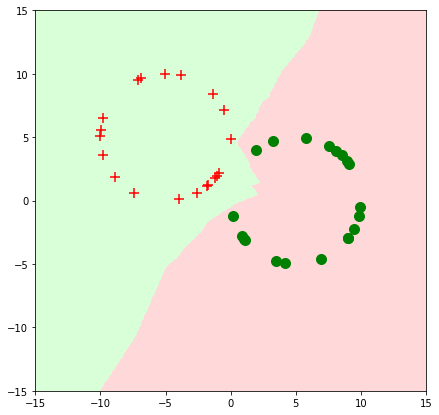

In [13]:
fig2 = pd.getFigure( 7, 7 )

tic = t.process_time()
pd.shade2D( Knn, fig2, mode = 'point', xlim = 15, ylim = 15 )
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the shading ")
pd.plot2D( XPos, fig2, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig2, color = 'g', marker = 'o' )